In [1]:
import os
import numpy as np
import pickle as pkl
from matplotlib import pyplot as plt
from statistics import mean
import pandas as pd
from scipy import stats
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
child = open('SGNet_PIE_child_test.pkl', 'rb')
child = pkl.load(child)

adult = open('SGNet_PIE_adult_test.pkl', 'rb')
adult = pkl.load(adult)

elderly = open('SGNet_PIE_elderly_test.pkl', 'rb')
elderly = pkl.load(elderly)

male = open('SGNet_PIE_male_test.pkl', 'rb')
male = pkl.load(male)

female = open('SGNet_PIE_female_test.pkl', 'rb')
female = pkl.load(female)

all = open('SGNet_PIE_all_test.pkl', 'rb')
all = pkl.load(all)

In [5]:
fig, ax = plt.subplots(figsize = (10, 10), dpi = 1200)
count, edges, bars = ax.hist(all['MSE_15'], bins = 20);
ax.set_xlabel('MSE (1.5s)')
ax.set_ylabel('# of tracks')
# ax.set_title('')
plt.bar_label(bars);

## Kruskal Wallis Test - Age

In [3]:
print('MSE 0.5: ', stats.kruskal(child['MSE_05'], adult['MSE_05'], elderly['MSE_05']))
print('MSE 1.0: ', stats.kruskal(child['MSE_10'], adult['MSE_10'], elderly['MSE_10']))
print('MSE 1.5: ', stats.kruskal(child['MSE_15'], adult['MSE_15'], elderly['MSE_15']))
print('CMSE 1.5: ', stats.kruskal(child['CMSE'], adult['CMSE'], elderly['CMSE']))
print('CFMSE 1.5: ', stats.kruskal(child['CFMSE'], adult['CFMSE'], elderly['CFMSE']))

MSE 0.5:  KruskalResult(statistic=337.7583281684002, pvalue=4.536395696774009e-74)
MSE 1.0:  KruskalResult(statistic=291.27983898176717, pvalue=5.6154765795637155e-64)
MSE 1.5:  KruskalResult(statistic=240.00767634357823, pvalue=7.638274729227253e-53)
CMSE 1.5:  KruskalResult(statistic=212.0909256489709, pvalue=8.811313724324769e-47)
CFMSE 1.5:  KruskalResult(statistic=173.9293392509388, pvalue=1.7049979498561347e-38)


## Mann-Whitney U Test - Age

#### Child/Adult

In [4]:
print('MSE 0.5: ', stats.mannwhitneyu(child['MSE_05'], adult['MSE_05']))
print('MSE 1.0: ', stats.mannwhitneyu(child['MSE_10'], adult['MSE_10']))
print('MSE 1.5: ', stats.mannwhitneyu(child['MSE_15'], adult['MSE_15']))
print('CMSE 1.5: ', stats.mannwhitneyu(child['CMSE'], adult['CMSE']))
print('CFMSE 1.5: ', stats.mannwhitneyu(child['CFMSE'], adult['CFMSE']))

MSE 0.5:  MannwhitneyuResult(statistic=1587577.0, pvalue=0.9416555700331143)
MSE 1.0:  MannwhitneyuResult(statistic=1664818.5, pvalue=0.4546309638522201)
MSE 1.5:  MannwhitneyuResult(statistic=1715754.0, pvalue=0.19737883178812976)
CMSE 1.5:  MannwhitneyuResult(statistic=1759789.0, pvalue=0.07890827343306818)
CFMSE 1.5:  MannwhitneyuResult(statistic=1827129.0, pvalue=0.013408156137894858)


#### Elderly/Adult

In [5]:
print('MSE 0.5: ', stats.mannwhitneyu(elderly['MSE_05'], adult['MSE_05']))
print('MSE 1.0: ', stats.mannwhitneyu(elderly['MSE_10'], adult['MSE_10']))
print('MSE 1.5: ', stats.mannwhitneyu(elderly['MSE_15'], adult['MSE_15']))
print('CMSE 1.5: ', stats.mannwhitneyu(elderly['CMSE'], adult['CMSE']))
print('CFMSE 1.5: ', stats.mannwhitneyu(elderly['CFMSE'], adult['CFMSE']))

MSE 0.5:  MannwhitneyuResult(statistic=57955359.5, pvalue=1.721917813834281e-75)
MSE 1.0:  MannwhitneyuResult(statistic=57245451.0, pvalue=2.6818982448561564e-65)
MSE 1.5:  MannwhitneyuResult(statistic=56381432.0, pvalue=6.550243978797186e-54)
CMSE 1.5:  MannwhitneyuResult(statistic=55856737.0, pvalue=1.538266038687265e-47)
CFMSE 1.5:  MannwhitneyuResult(statistic=55053584.0, pvalue=1.3872122543355617e-38)


#### Child/Adult one side

In [8]:
print('MSE 0.5: ', stats.mannwhitneyu(child['MSE_05'], adult['MSE_05'], alternative = 'greater'))
print('MSE 1.0: ', stats.mannwhitneyu(child['MSE_10'], adult['MSE_10'], alternative = 'greater'))
print('MSE 1.5: ', stats.mannwhitneyu(child['MSE_15'], adult['MSE_15'], alternative = 'greater'))
print('CMSE 1.5: ', stats.mannwhitneyu(child['CMSE'], adult['CMSE'], alternative = 'greater'))
print('CFMSE 1.5: ', stats.mannwhitneyu(child['CFMSE'], adult['CFMSE'], alternative = 'greater'))

MSE 0.5:  MannwhitneyuResult(statistic=1587577.0, pvalue=0.529176443568694)
MSE 1.0:  MannwhitneyuResult(statistic=1664818.5, pvalue=0.22731548192611006)
MSE 1.5:  MannwhitneyuResult(statistic=1715754.0, pvalue=0.09868941589406488)
CMSE 1.5:  MannwhitneyuResult(statistic=1759789.0, pvalue=0.03945413671653409)
CFMSE 1.5:  MannwhitneyuResult(statistic=1827129.0, pvalue=0.006704078068947429)


#### Elderly/Adult one side

In [9]:
print('MSE 0.5: ', stats.mannwhitneyu(elderly['MSE_05'], adult['MSE_05'], alternative = 'greater'))
print('MSE 1.0: ', stats.mannwhitneyu(elderly['MSE_10'], adult['MSE_10'], alternative = 'greater'))
print('MSE 1.5: ', stats.mannwhitneyu(elderly['MSE_15'], adult['MSE_15'], alternative = 'greater'))
print('CMSE 1.5: ', stats.mannwhitneyu(elderly['CMSE'], adult['CMSE'], alternative = 'greater'))
print('CFMSE 1.5: ', stats.mannwhitneyu(elderly['CFMSE'], adult['CFMSE'], alternative = 'greater'))

MSE 0.5:  MannwhitneyuResult(statistic=57955359.5, pvalue=8.609589069171405e-76)
MSE 1.0:  MannwhitneyuResult(statistic=57245451.0, pvalue=1.3409491224280782e-65)
MSE 1.5:  MannwhitneyuResult(statistic=56381432.0, pvalue=3.275121989398593e-54)
CMSE 1.5:  MannwhitneyuResult(statistic=55856737.0, pvalue=7.691330193436325e-48)
CFMSE 1.5:  MannwhitneyuResult(statistic=55053584.0, pvalue=6.936061271677808e-39)


### Mann-Whitney U Test - Gender

In [7]:
print('MSE 0.5: ', stats.mannwhitneyu(male['MSE_05'], female['MSE_05']))
print('MSE 1.0: ', stats.mannwhitneyu(male['MSE_10'], female['MSE_10']))
print('MSE 1.5: ', stats.mannwhitneyu(male['MSE_15'], female['MSE_15']))
print('CMSE 1.5: ', stats.mannwhitneyu(male['CMSE'], female['CMSE']))
print('CFMSE 1.5: ', stats.mannwhitneyu(male['CFMSE'], female['CFMSE']))

MSE 0.5:  MannwhitneyuResult(statistic=163821882.5, pvalue=0.2941941235752036)
MSE 1.0:  MannwhitneyuResult(statistic=164036445.5, pvalue=0.2057116020546016)
MSE 1.5:  MannwhitneyuResult(statistic=163520247.0, pvalue=0.4564929465478804)
CMSE 1.5:  MannwhitneyuResult(statistic=162754945.0, pvalue=0.9780560460488885)
CFMSE 1.5:  MannwhitneyuResult(statistic=162174208.5, pvalue=0.5395904136181986)


In [6]:
print('MSE 0.5: ', stats.mannwhitneyu(male['MSE_05'], female['MSE_05'], alternative = 'greater'))
print('MSE 1.0: ', stats.mannwhitneyu(male['MSE_10'], female['MSE_10'], alternative = 'greater'))
print('MSE 1.5: ', stats.mannwhitneyu(male['MSE_15'], female['MSE_15'], alternative = 'greater'))
print('CMSE 1.5: ', stats.mannwhitneyu(male['CMSE'], female['CMSE'], alternative = 'greater'))
print('CFMSE 1.5: ', stats.mannwhitneyu(male['CFMSE'], female['CFMSE'], alternative = 'greater'))

MSE 0.5:  MannwhitneyuResult(statistic=163821882.5, pvalue=0.1470970617876018)
MSE 1.0:  MannwhitneyuResult(statistic=164036445.5, pvalue=0.1028558010273008)
MSE 1.5:  MannwhitneyuResult(statistic=163520247.0, pvalue=0.2282464732739402)
CMSE 1.5:  MannwhitneyuResult(statistic=162754945.0, pvalue=0.5109723793308062)
CFMSE 1.5:  MannwhitneyuResult(statistic=162174208.5, pvalue=0.7302051266644998)


## Distribution Fit

In [12]:
for error in all:
    all[error] = np.array(all[error])
for error in child:
    child[error] = np.array(child[error])
for error in adult:
    adult[error] = np.array(adult[error])
for error in elderly:
    elderly[error] = np.array(elderly[error])
for error in male:
    male[error] = np.array(male[error])

In [13]:
distribution1 = ['cauchy', 'chi2', 'expon', 'exponpow']
distribution2 = ['lognorm', 'powerlaw', 'rayleigh', 'gamma']

,sumsquare_error,aic,bic,kl_div
expon,8.258925e-08,16272.449502,-970585.921698,inf
chi2,8.702542e-07,3290.320627,-885308.995208,inf
exponpow,9.496619e-07,2653.294352,-882147.286958,inf
cauchy,1.239378e-06,3514.162765,-872517.073371,inf


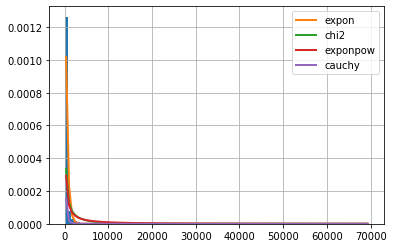

In [14]:
f = Fitter(all['MSE_15'],
           distributions = distribution1)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,9.131632e-07,3.009753e+03,-883566.330661,inf
rayleigh,1.022357e-06,4.143678e+04,-879487.098785,inf
powerlaw,1.279929e-06,2.340589e+03,-871340.860860,inf
gamma,1.605292e-06,1.626109e+06,-863139.720134,0.128117


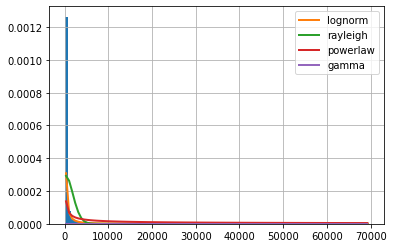

In [15]:
f = Fitter(all['MSE_15'],
           distributions = distribution2)
f.fit()
f.summary()

## Wasserstein distance

#### child/all

In [3]:
print('MSE 0.5: ', stats.wasserstein_distance(child['MSE_05'], all['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(child['MSE_10'], all['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(child['MSE_15'], all['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(child['CMSE'], all['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(child['CFMSE'], all['CFMSE']))

MSE 0.5:  79.88567249498442
MSE 1.0:  391.4322615282353
MSE 1.5:  1139.84849051683
CMSE 1.5:  1137.5141016468942
CFMSE 1.5:  4165.331788073068


#### adult/all

In [4]:
print('MSE 0.5: ', stats.wasserstein_distance(adult['MSE_05'], all['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(adult['MSE_10'], all['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(adult['MSE_15'], all['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(adult['CMSE'], all['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(adult['CFMSE'], all['CFMSE']))

MSE 0.5:  2.459720131069154
MSE 1.0:  6.578719695174331
MSE 1.5:  14.659797983643971
CMSE 1.5:  13.16539158265657
CFMSE 1.5:  44.13685797341634


#### elderly/all

In [5]:
print('MSE 0.5: ', stats.wasserstein_distance(elderly['MSE_05'], all['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(elderly['MSE_10'], all['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(elderly['MSE_15'], all['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(elderly['CMSE'], all['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(elderly['CFMSE'], all['CFMSE']))

MSE 0.5:  25.72584896808143
MSE 1.0:  62.87624156720009
MSE 1.5:  134.066297071937
CMSE 1.5:  117.20116408096433
CFMSE 1.5:  405.67290129302216


#### male/all

In [6]:
print('MSE 0.5: ', stats.wasserstein_distance(male['MSE_05'], all['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(male['MSE_10'], all['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(male['MSE_15'], all['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(male['CMSE'], all['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(male['CFMSE'], all['CFMSE']))

MSE 0.5:  2.186343386048943
MSE 1.0:  3.281568305209636
MSE 1.5:  20.692724077429204
CMSE 1.5:  21.693910829218815
CFMSE 1.5:  106.88077328647769


#### female/all

In [7]:
print('MSE 0.5: ', stats.wasserstein_distance(female['MSE_05'], all['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(female['MSE_10'], all['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(female['MSE_15'], all['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(female['CMSE'], all['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(female['CFMSE'], all['CFMSE']))

MSE 0.5:  2.575634556808014
MSE 1.0:  3.865870650217833
MSE 1.5:  24.377184091217405
CMSE 1.5:  25.556637973979974
CFMSE 1.5:  125.91151732690192


#### child/adult

In [8]:
print('MSE 0.5: ', stats.wasserstein_distance(child['MSE_05'], adult['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(child['MSE_10'], adult['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(child['MSE_15'], adult['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(child['CMSE'], adult['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(child['CFMSE'], adult['CFMSE']))

MSE 0.5:  81.00167593639225
MSE 1.0:  395.9631751836207
MSE 1.5:  1153.3601255470949
CMSE 1.5:  1149.9846250327646
CFMSE 1.5:  4208.569172472817


#### elderly/adult

In [9]:
print('MSE 0.5: ', stats.wasserstein_distance(elderly['MSE_05'], adult['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(elderly['MSE_10'], adult['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(elderly['MSE_15'], adult['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(elderly['CMSE'], adult['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(elderly['CFMSE'], adult['CFMSE']))

MSE 0.5:  28.185569084288744
MSE 1.0:  69.45496126237441
MSE 1.5:  148.2378754316509
CMSE 1.5:  129.6673642816261
CFMSE 1.5:  447.1984578127144


#### male/female

In [10]:
print('MSE 0.5: ', stats.wasserstein_distance(male['MSE_05'], female['MSE_05']))
print('MSE 1.0: ', stats.wasserstein_distance(male['MSE_10'], female['MSE_10']))
print('MSE 1.5: ', stats.wasserstein_distance(male['MSE_15'], female['MSE_15']))
print('CMSE 1.5: ', stats.wasserstein_distance(male['CMSE'], female['CMSE']))
print('CFMSE 1.5: ', stats.wasserstein_distance(male['CFMSE'], female['CFMSE']))

MSE 0.5:  4.761977942856957
MSE 1.0:  7.14743895542747
MSE 1.5:  45.069908168646606
CMSE 1.5:  47.25054880319879
CFMSE 1.5:  232.79229061337958
